# MIMO for Event History

In [1]:
import numpy as np
import mdof
import quakeio
from mdof import modal, transform
from mdof.utilities import Config, extract_channels, list_files, print_modes, mode_statistics

### Data inputs

In [2]:
directory = "uploads/CE89324/"
pattern  = "????????*.[zZ][iI][pP]"
# pattern = "sanlorenzo_28june2021.zip"
# pattern = "*[sb][ae][nr][lk]*"

# with open('../../Caltrans.Hayward/CGS_data/function_test_zips.txt', 'r') as readfile:
#     function_tests = readfile.read().split("\n")
# import glob
# events = [quakeio.read(event) for event in glob.glob('../CGS_data/58658*P.zip') if event[-33:] not in function_tests]

from pathlib import Path
# for file in Path(directory).glob(pattern):
#     if str(file)[-33:] in function_tests:
#         print(file)
# files = [file for file in Path(directory).glob(pattern) if str(file)[-33:] not in function_tests]
files = [file for file in Path(directory).glob(pattern)]

In [3]:
data_conf = Config()

# PAINTER RIO DELL TRANSVERSE (CASE 1)
title = "Painter St Bridge Transverse Mode"
data_conf.inputs  = [3,17,20]
data_conf.outputs = [7,9,4]
# # PAINTER RIO DELL LONGITUDINAL (CASE 2)
# data_conf.inputs  = [15,1,18]
# data_conf.outputs = [11]

# # HWY8/MELOLAND TRANSVERSE (CASE 1)
# data_conf.inputs  = [2],
# data_conf.outputs = [5,7,9]
# # HWY8/MELOLAND TRANSVERSE (CASE 2)
# data_conf.inputs  = [11,2,26],
# data_conf.outputs = [5,7,9]
# # HWY8/MELOLAND LONGITUDINAL (CASE 3)
# data_conf.inputs  = [12,4,25],
# data_conf.outputs = [27,8]

# # CROWLEY TRANSVERSE (CASE 1)
# data_conf.inputs = [4]
# data_conf.outputs = [6,7,9]
# # CROWLEY TRANSVERSE (CASE 2)
# data_conf.inputs = [6,4,9]
# data_conf.outputs = [7]
# # CROWLEY TRANSVERSE (CASE 3)
# data_conf.inputs = [4]
# data_conf.outputs = [7]
# # CROWLEY LONGITUDINAL (CASE 4)
# data_conf.inputs = [5]
# data_conf.outputs = [8]

# # RIDGECREST TRANSVERSE (CASE 1)
# data_conf.inputs  = [4]
# data_conf.outputs = [6,7,9]

# # CAPISTRANO TRANSVERSE (CASE 1)
# data_conf.inputs  = [4]
# data_conf.outputs = [10,7]

# # HAYWARD TRANSVERSE (CASE 1)
# title = "Hayward Bridge Transverse Mode (In: Ch25, Out: Ch23)"
# data_conf.inputs  = [25,2,7,18]
# data_conf.outputs = [23,13,15,20]
# # HAYWARD LONGITUDINAL (CASE 2)
# title = "Hayward Bridge Longitudinal Mode (In: Ch3, Out: Ch12)"
# data_conf.inputs  = [3,6,17]
# data_conf.outputs = [12,14,19]
# # HAYWARD LONGITUDINAL Alternative
# title = "Hayward Bridge Longitudinal Mode (In: Ch6, Out: Ch14)"
# data_conf.inputs  = [6,3,17]
# data_conf.outputs = [14,12,19]

# # BERNARDINO TRANSVERSE BENT 3 (CASE 1)
# data_conf.inputs  = [6]
# data_conf.outputs = [7,8]
# # BERNARDINO TRANSVERSE BENT 8 (CASE 2)
# data_conf.inputs  = [24]
# data_conf.outputs = [19,20]
# # BERNARDINO LONGITUDINAL BENT 3 (CASE 3)
# data_conf.inputs  = [4]
# data_conf.outputs = [10]
# # BERNARDINO LONGITUDINAL BENT 8 (CASE 4)
# data_conf.inputs  = [22]
# data_conf.outputs = [17,18]

# # VINCENT THOMAS (CE14406) TRANSVERSE (CASE 1)
# data_conf.inputs  = [1,9,24]
# data_conf.outputs = [2,5,7]
# # VINCENT THOMAS TRANSVERSE DENSE (CASE 2)
# data_conf.inputs  = [1,9,24]
# data_conf.outputs = [2,4,5,6,7]
# # VINCENT THOMAS VERTICAL SOUTH DECK EDGE (CASE 3)
# data_conf.inputs  = [14,19,26]
# data_conf.outputs = [16,18,22]

### Method Inputs

### General Parameters
parameter | value
----------|-------
`p ` | number of output channels
`q ` | number of input channels
`nt` | number of timesteps
`dt` | timestep
`decimation`  | decimation (downsampling) factor
`order` | model order (2 times number of DOF)

### Specific to Observer Kalman Identification (OKID)
parameter | value
----------|-------
`m`  | number of Markov parameters to compute (at most = nt)

### Specific to Eigensystem Realization Algorithm (ERA)
parameter | value
----------|-------
`horizon` | number of observability parameters, or prediction horizon
`nc` | number of controllability parameters

### Specific to Data Correlations (DC)
parameter | value
----------|-------
`a`  | (alpha) number of additional block rows in Hankel matrix of correlation matrices
`b`  | (beta) number of additional block columns in Hankel matrix of correlation matrices
`l`  | initial lag
`g`  | lag (gap) between correlations

### Specific to System Realization with Information Matrix (SRIM)
parameter | value
----------|-------
`horizon` | number of steps used for identification, or prediction horizon

### Parameters for Mode Validation
parameter | value
----------|-------
`outlook` | number of steps used for temporal consistency in EMAC

In [4]:
# Set Parameters
conf = Config()
conf.m  = 500
conf.horizon = 190
conf.nc = 190
conf.order  = 12
conf.a  = 0  
conf.b  = 0  
conf.l  = 10 
conf.g  = 3
conf.period_band = (0.1,0.6)
conf.damping = 0.06
conf.pseudo = True
conf.outlook = 190

uploads/CE89324/bayview_11oct2013_72086051_ce89324p.zip
peak acceleration (cm/s/s): 0.08968811979625821
event date/time: 2013-10-11T23:05:00


100%|█████████▉| 1310/1311 [00:00<00:00, 2797.40it/s]
/mnt/c/Users/16507/Documents/GitHub/mdof/src/mdof/validation.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  (abs(Phi_final[j,i])/abs(Phi_final_hat[j,i])),
/mnt/c/Users/16507/Documents/GitHub/mdof/src/mdof/validation.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  Pij = np.angle(Phi_final[j,i]/Phi_final_hat[j,i])
/mnt/c/Users/16507/Documents/GitHub/mdof/src/mdof/validation.py:25: RuntimeWarning: invalid value encountered in scalar divide
  Pij = np.angle(Phi_final[j,i]/Phi_final_hat[j,i])


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2709     0.001132   1.0        0.8338     0.8338   
      0.2527     -0.003276  1.0        0.9749     0.9749   
      0.2409     -0.0003217  1.0        0.8874     0.8874   
      0.2337     -0.0001491  1.0        0.8368     0.8368   
      0.2282     0.03774    1.0        0.9219     0.9219   
      0.2133     0.02379    1.0        0.3374     0.3374   
Mean Period(s): 0.23994997335785354
Standard Dev(s): 0.018299795578285944
uploads/CE89324/ferndaleoffshore_08dec2016_us20007z6r_ce89324p.zip
peak acceleration (cm/s/s): 0.0309698011043518
event date/time: 2016-12-08T14:50:00


100%|█████████▉| 686/687 [00:00<00:00, 3739.57it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2359     0.0038     1.0        0.9453     0.9453   
      0.227      0.03918    1.0        0.9725     0.9725   
      0.2238     0.005151   1.0        0.9662     0.9662   
      0.2093     0.009579   1.0        0.604      0.604    
      0.2032     0.02393    1.0        0.9483     0.9483   
Mean Period(s): 0.2198378985029327
Standard Dev(s): 0.011930582991559777
uploads/CE89324/ferndale_28jan2015_72387946_ce89324p.zip
peak acceleration (cm/s/s): 0.29095970591383613
event date/time: 2015-01-28T21:08:00


100%|█████████▉| 874/875 [00:00<00:00, 2430.12it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.3119     0.01321    1.0        0.8887     0.8887   
      0.2602     -0.004556  1.0        0.7266     0.7266   
      0.2555     0.04334    1.0        0.972      0.972    
      0.2482     0.01867    1.0        0.878      0.878    
      0.2299     0.008439   1.0        0.7712     0.7712   
Mean Period(s): 0.2611389841543662
Standard Dev(s): 0.027387551087977212
uploads/CE89324/nc73201181_ce89324p.zip
peak acceleration (cm/s/s): 0.24803781107717035
event date/time: 2019-06-23T03:52:00


100%|█████████▉| 831/832 [00:00<00:00, 2851.74it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.7111     0.06989    1.0        0.2373     0.2373   
      0.2911     0.4793     0.0        0.2207     0.0      
      0.2839     0.01621    1.0        0.9861     0.9861   
      0.2669     0.008783   1.0        0.8865     0.8865   
      0.2449     0.02909    1.0        0.9715     0.9715   
      0.2391     0.09027    0.9816     0.9734     0.9555   
Mean Period(s): 0.3394953575166668
Standard Dev(s): 0.16723260984290814
uploads/CE89324/nc73351710_ce89324p.zip
peak acceleration (cm/s/s): 0.05459458632662379
event date/time: 2020-03-09T02:59:00


100%|█████████▉| 868/869 [00:00<00:00, 3154.22it/s]
/mnt/c/Users/16507/Documents/GitHub/mdof/src/mdof/validation.py:22: RuntimeWarning: overflow encountered in scalar divide
  (abs(Phi_final[j,i])/abs(Phi_final_hat[j,i])),
/mnt/c/Users/16507/Documents/GitHub/mdof/src/mdof/validation.py:25: RuntimeWarning: overflow encountered in scalar divide
  Pij = np.angle(Phi_final[j,i]/Phi_final_hat[j,i])


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2298     0.02758    1.0        0.9018     0.9018   
      0.2293     0.01291    1.0        0.6597     0.6597   
      0.2141     0.005794   1.0        0.8125     0.8125   
      0.198      0.01652    1.0        0.954      0.954    
      0.1856     0.007892   1.0        0.9607     0.9607   
      0.1639     0.004047   1.0        0.953      0.953    
Mean Period(s): 0.20345404869738418
Standard Dev(s): 0.023751109375293695
uploads/CE89324/nc73666231_ce89324p.zip
peak acceleration (cm/s/s): 0.03086884919926699
event date/time: 2021-12-20T21:53:00


100%|█████████▉| 631/632 [00:00<00:00, 3488.93it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2969     0.04186    1.0        0.3244     0.3244   
      0.2725     0.03001    1.0        0.8513     0.8513   
      0.2432     0.02007    1.0        0.9816     0.9816   
      0.2255     0.03043    1.0        0.8075     0.8075   
      0.2231     0.0144     1.0        0.8528     0.8528   
      0.1644     0.007564   1.0        0.9913     0.9913   
Mean Period(s): 0.23760239670897634
Standard Dev(s): 0.04178679196543965
uploads/CE89324/nc73667866_ce89324p.zip
peak acceleration (cm/s/s): 0.0334935987314721
event date/time: 2021-12-23T03:28:00


100%|█████████▉| 647/648 [00:00<00:00, 2921.02it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2674     0.07844    1.0        0.2192     0.2192   
      0.2388     0.01897    1.0        0.08927    0.08927  
      0.2295     0.06567    1.0        0.5181     0.5181   
      0.2229     0.03194    1.0        0.1985     0.1985   
      0.2029     0.0984     0.0        0.7416     0.0      
Mean Period(s): 0.23230004145681832
Standard Dev(s): 0.021121709869499437
uploads/CE89324/nc73714181_ce89324p.zip
peak acceleration (cm/s/s): 0.0555306858101375
event date/time: 2022-04-04T15:16:00


100%|█████████▉| 694/695 [00:00<00:00, 3227.48it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.3978     0.1306     0.999      0.7373     0.7366   
      0.3016     0.02847    1.0        0.7979     0.7979   
      0.2591     0.03579    1.0        0.7103     0.7103   
      0.236      0.009554   1.0        0.8541     0.8541   
      0.2        0.03356    1.0        0.4057     0.4057   
      0.1853     0.004686   1.0        0.1831     0.1831   
Mean Period(s): 0.26330029980424335
Standard Dev(s): 0.07122094533951925
uploads/CE89324/nc73821036_ce89324p.zip
peak acceleration (cm/s/s): 1.383676382862611
event date/time: 2022-12-20T10:34:00


100%|█████████▉| 1229/1230 [00:00<00:00, 2031.28it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.4041     0.02136    1.0        0.1498     0.1498   
      0.3177     0.008901   1.0        0.8627     0.8627   
      0.3006     0.00409    1.0        0.9268     0.9268   
      0.2818     0.019      1.0        0.9697     0.9697   
      0.2801     0.007793   1.0        0.8783     0.8783   
      0.2441     0.1093     0.0        0.9427     0.0      
Mean Period(s): 0.30472630578237564
Standard Dev(s): 0.04979492943916137
uploads/CE89324/nc73821046_ce89324p.zip
peak acceleration (cm/s/s): 0.14265523904696928
event date/time: 2022-12-20T10:38:00


100%|█████████▉| 662/663 [00:00<00:00, 3293.81it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.3001     0.04037    1.0        0.7879     0.7879   
      0.2674     0.03467    1.0        0.1593     0.1593   
      0.2591     0.06272    1.0        0.6758     0.6758   
      0.2469     0.03627    1.0        0.8245     0.8245   
      0.2256     0.03078    1.0        0.7015     0.7015   
      0.1745     0.03043    1.0        0.8787     0.8787   
Mean Period(s): 0.24562036099206588
Standard Dev(s): 0.03891069442725679
uploads/CE89324/nc73821636_ce89324p.zip
peak acceleration (cm/s/s): 0.05195556076743699
event date/time: 2022-12-20T15:08:00


100%|█████████▉| 673/674 [00:00<00:00, 3263.65it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2833     0.009959   1.0        0.6816     0.6816   
      0.2434     0.01689    1.0        0.8856     0.8856   
      0.2357     0.0112     1.0        0.2451     0.2451   
      0.2286     0.07124    0.9997     0.5308     0.5307   
      0.2061     0.04924    1.0        0.9692     0.9692   
      0.1684     0.03321    1.0        0.5699     0.5699   
Mean Period(s): 0.22757668980306411
Standard Dev(s): 0.035105751920271676
uploads/CE89324/nc73827571_ce89324p.zip
peak acceleration (cm/s/s): 1.0326227610855614
event date/time: 2023-01-01T18:34:00


100%|█████████▉| 914/915 [00:00<00:00, 2790.32it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.6212     0.09436    1.0        0.6528     0.6528   
      0.5406     0.009841   1.0        0.8737     0.8737   
      0.4367     0.04506    1.0        0.2452     0.2452   
      0.317      0.01029    1.0        0.4412     0.4412   
      0.2569     0.08572    0.9981     0.9454     0.9436   
Mean Period(s): 0.43446338020788094
Standard Dev(s): 0.135248746030292
uploads/CE89324/nc73890906_ce89324p.zip
peak acceleration (cm/s/s): 0.03387293316269989
event date/time: 2023-05-21T18:44:00


100%|█████████▉| 694/695 [00:00<00:00, 3570.98it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2607     0.02224    1.0        0.003157   0.003157 
      0.2449     0.006788   1.0        0.9932     0.9932   
      0.24       -0.0008864  1.0        0.8373     0.8373   
      0.2263     0.02832    1.0        0.7906     0.7906   
      0.2163     0.04559    1.0        0.9555     0.9555   
      0.1748     0.001106   1.0        0.2454     0.2454   
Mean Period(s): 0.22716129703328078
Standard Dev(s): 0.027283894562145704
uploads/CE89324/nc73925281_ce89324p.zip
peak acceleration (cm/s/s): 0.06364150856816372
event date/time: 2023-08-17T21:07:00


100%|█████████▉| 630/631 [00:00<00:00, 3282.62it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2699     0.0214     1.0        0.8534     0.8534   
      0.2567     0.0137     1.0        0.8951     0.8951   
      0.2341     0.01072    1.0        0.8903     0.8903   
      0.2289     0.03392    1.0        0.8739     0.8739   
      0.1989     0.04318    1.0        0.3868     0.3868   
      0.1875     0.04915    1.0        0.5938     0.5938   
Mean Period(s): 0.2293200412000863
Standard Dev(s): 0.0291395338325928
uploads/CE89324/nc73943821_ce89324p.zip
peak acceleration (cm/s/s): 0.14367291582752123
event date/time: 2023-09-30T15:26:00


100%|█████████▉| 847/848 [00:00<00:00, 2462.05it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2995     0.167      3.421e-06  0.7725     2.643e-06
      0.2993     0.02577    1.0        0.9075     0.9075   
      0.2771     0.0185     1.0        0.5027     0.5027   
      0.2408     0.05081    1.0        0.9846     0.9846   
      0.2406     0.01957    1.0        0.3401     0.3401   
      0.2258     0.01386    1.0        0.8403     0.8403   
Mean Period(s): 0.2638545307195747
Standard Dev(s): 0.029487962104481222
uploads/CE89324/nc73943846_ce89324p.zip
peak acceleration (cm/s/s): 0.03849122789127679
event date/time: 2023-09-30T17:16:00


100%|█████████▉| 681/682 [00:00<00:00, 3317.84it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.3023     0.01819    1.0        0.2348     0.2348   
      0.267      0.008803   1.0        0.9788     0.9788   
      0.25       0.00471    1.0        0.9933     0.9933   
      0.2456     0.02944    1.0        0.8872     0.8872   
      0.224      0.02218    1.0        0.5677     0.5677   
      0.1742     0.01788    1.0        0.773      0.773    
Mean Period(s): 0.24386981838679792
Standard Dev(s): 0.039228056430184274
uploads/CE89324/nc73947830_ce89324p.zip
peak acceleration (cm/s/s): 0.0888590905151072
event date/time: 2023-10-16T10:20:00


100%|█████████▉| 817/818 [00:00<00:00, 2623.80it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.274      0.01049    1.0        0.9654     0.9654   
      0.2532     0.01449    1.0        0.9427     0.9427   
      0.242      0.02182    1.0        0.8538     0.8538   
      0.2133     0.03244    1.0        0.95       0.95     
      0.2036     0.005486   1.0        0.5928     0.5928   
      0.1705     0.03361    1.0        0.9997     0.9997   
Mean Period(s): 0.2260988923437577
Standard Dev(s): 0.03424197733255784
uploads/CE89324/petrolia_05dec2016_72733405_ce89324p.zip
peak acceleration (cm/s/s): 0.1685203407891537
event date/time: 2016-12-05T18:32:00


100%|█████████▉| 1310/1311 [00:00<00:00, 2268.43it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2964     0.01012    1.0        0.9602     0.9602   
      0.2634     0.04313    1.0        0.8054     0.8054   
      0.2474     0.0159     1.0        0.8673     0.8673   
      0.2425     0.012      1.0        0.8418     0.8418   
      0.2228     0.01331    1.0        0.4284     0.4284   
      0.2051     0.005986   1.0        0.8064     0.8064   
Mean Period(s): 0.24628060042194092
Standard Dev(s): 0.029050118993510156
uploads/CE89324/riodell_14sep2012_71842075_ce89324p.zip
peak acceleration (cm/s/s): 0.22396333100497512
event date/time: 2012-09-14T11:53:00


100%|█████████▉| 1310/1311 [00:00<00:00, 2202.84it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2735     0.03582    1.0        0.94       0.94     
      0.2556     0.06232    1.0        0.998      0.998    
      0.2391     0.005624   1.0        0.9759     0.9759   
      0.2049     0.01358    1.0        0.8958     0.8958   
      0.1772     0.0223     1.0        0.8821     0.8821   
      0.1482     0.01812    1.0        0.3485     0.3485   
Mean Period(s): 0.21639806443333587
Standard Dev(s): 0.044021503974215184
uploads/CE89324/RioDell_14Sep2012_71842255_ce89324p.zip
peak acceleration (cm/s/s): 0.07422310371023538
event date/time: 2012-09-14T18:19:00


100%|█████████▉| 1308/1309 [00:00<00:00, 2324.76it/s]
/tmp/ipykernel_8886/935611368.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8,4))


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2714     0.05105    1.0        0.9265     0.9265   
      0.251      0.01593    1.0        0.9835     0.9835   
      0.2448     0.005598   1.0        0.9567     0.9567   
      0.2336     -0.01353   1.0        0.8569     0.8569   
      0.2278     0.01632    1.0        0.9895     0.9895   
      0.2056     0.1652     0.001749   0.7744     0.001354 
Mean Period(s): 0.2390252160923849
Standard Dev(s): 0.020402118014418713
uploads/CE89324/riodell_19oct2014_72330211_ce89324p.zip
peak acceleration (cm/s/s): 0.06183661087119283
event date/time: 2014-10-19T14:23:00


100%|█████████▉| 671/672 [00:00<00:00, 921.40it/s]


Spectral quantities:
       T(s)        ζ        EMACO      MPC       EMACO*MPC
      0.2918     0.01039    1.0        0.9987     0.9987   
      0.2418     -0.006623  1.0        0.3285     0.3285   
      0.2226     0.02352    1.0        0.9517     0.9517   
      0.1945     0.1566     2.336e-19  0.9412     2.199e-19
      0.1651     0.006289   1.0        0.7292     0.7292   
Mean Period(s): 0.22316051950726906
Standard Dev(s): 0.043014035030129405


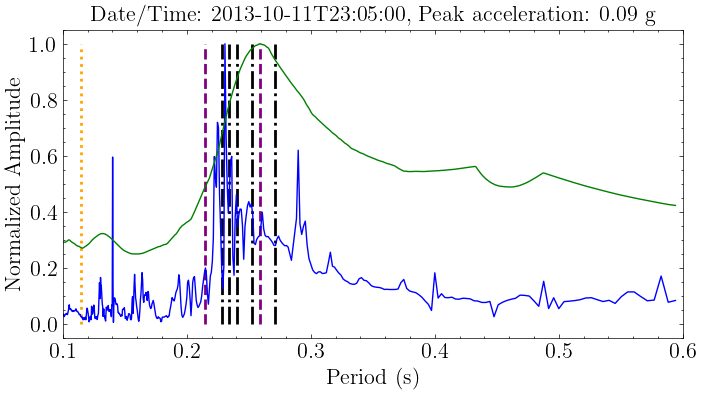

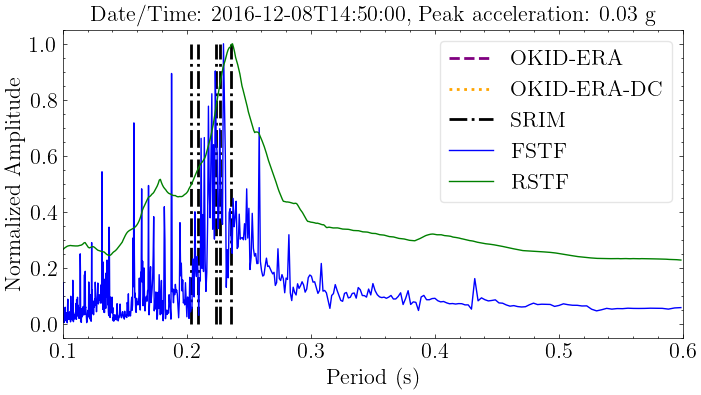

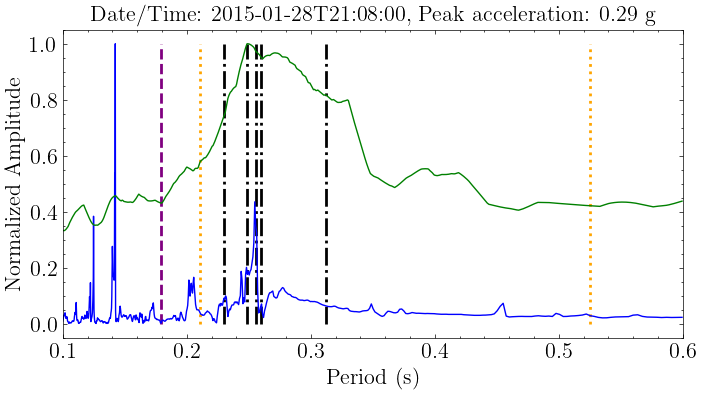

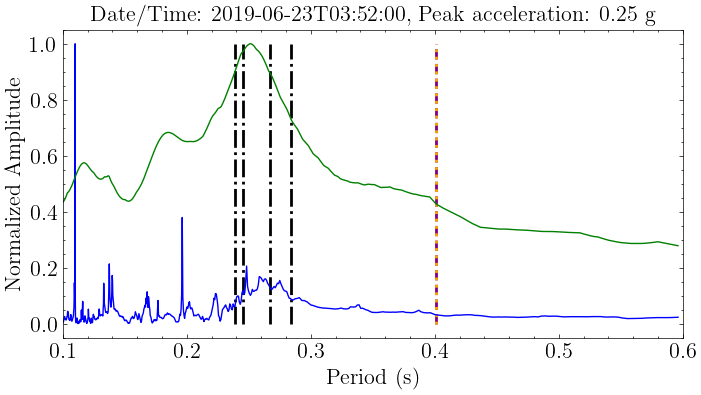

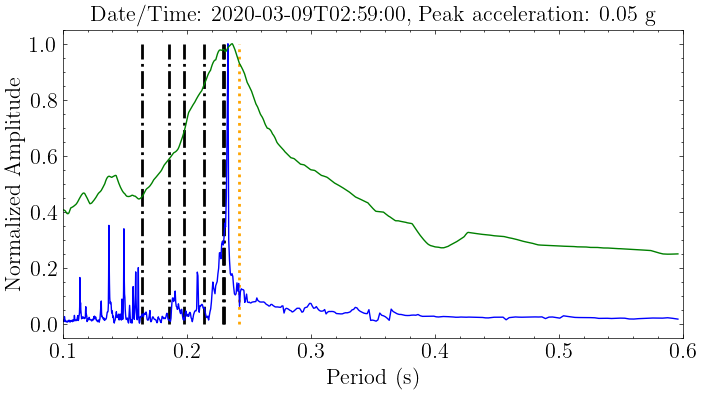

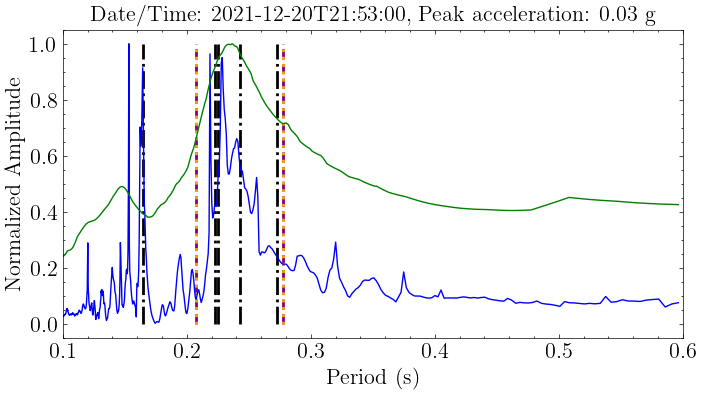

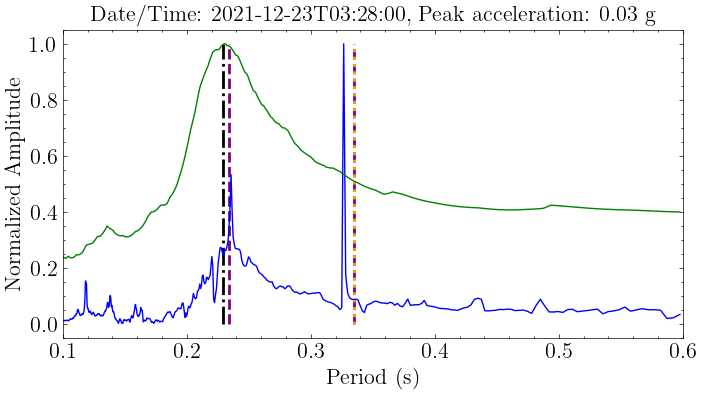

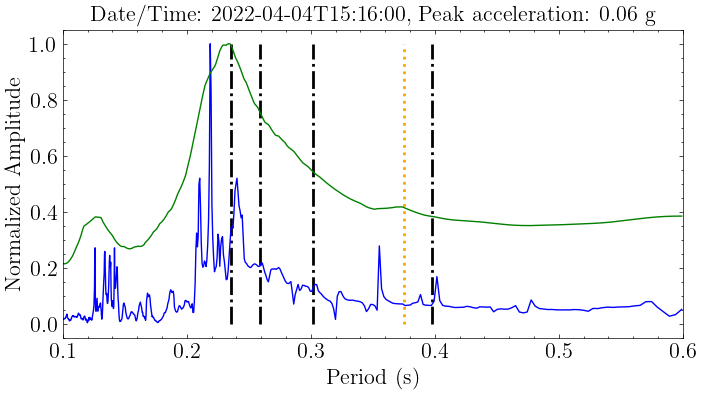

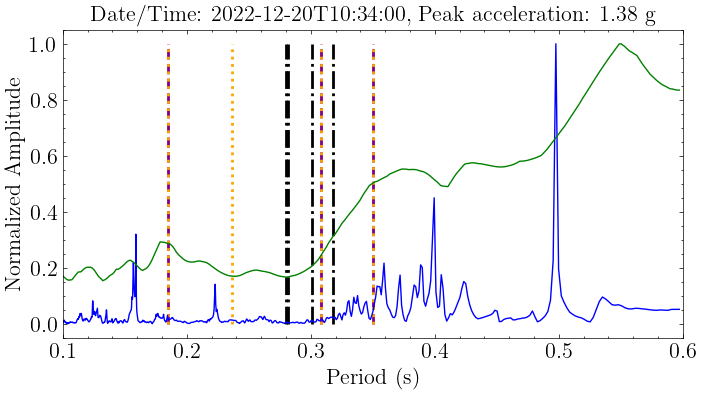

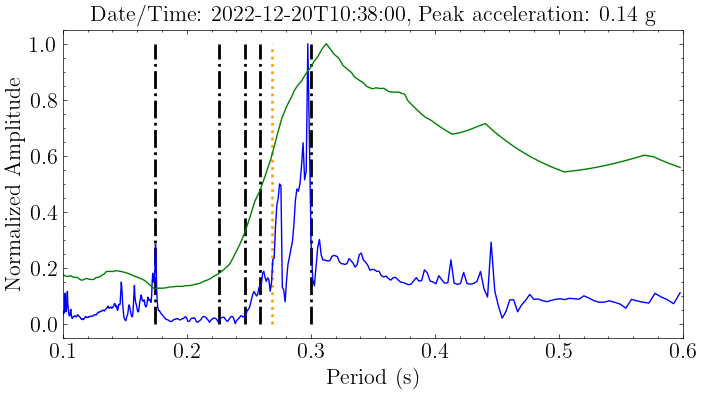

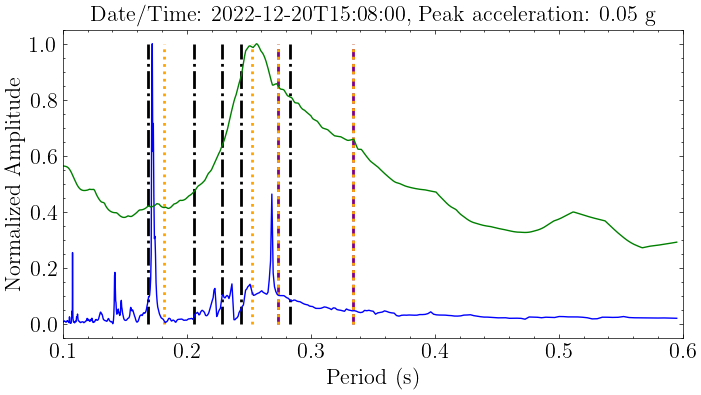

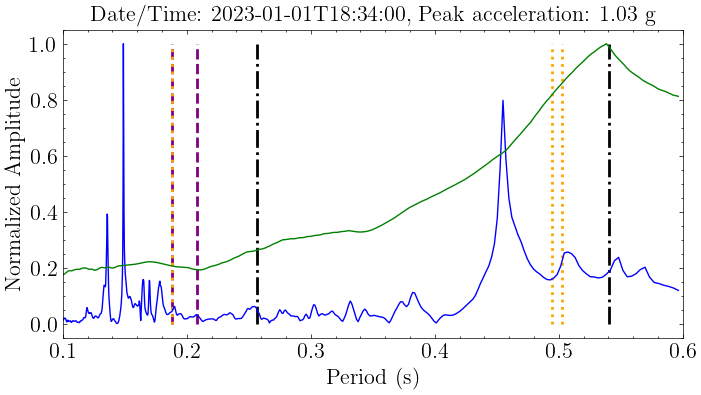

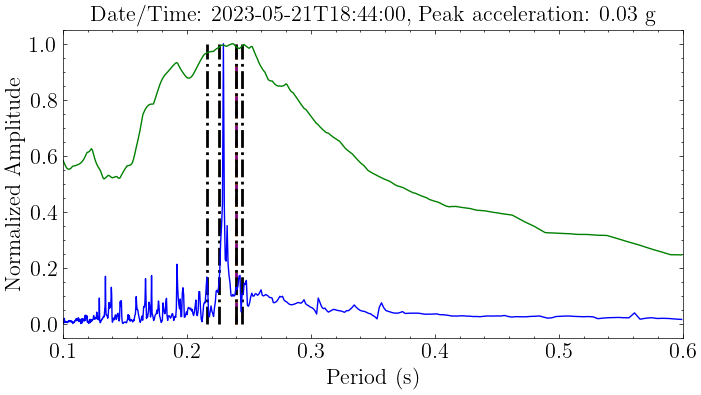

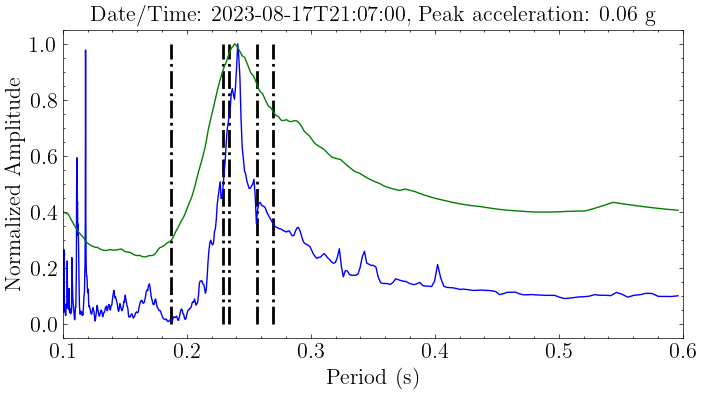

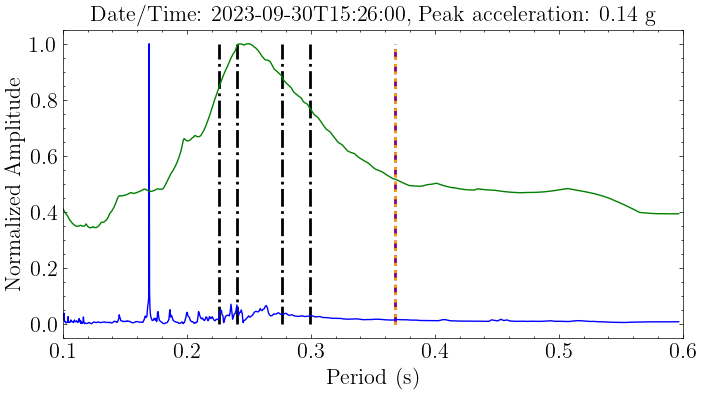

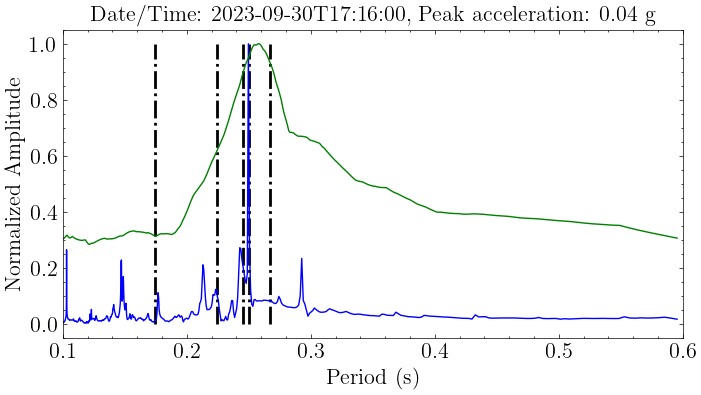

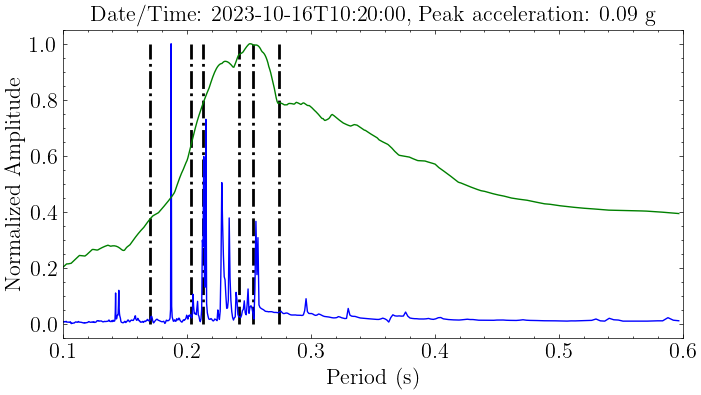

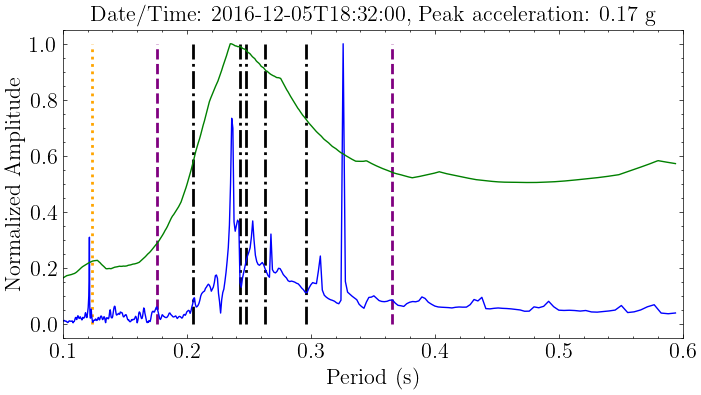

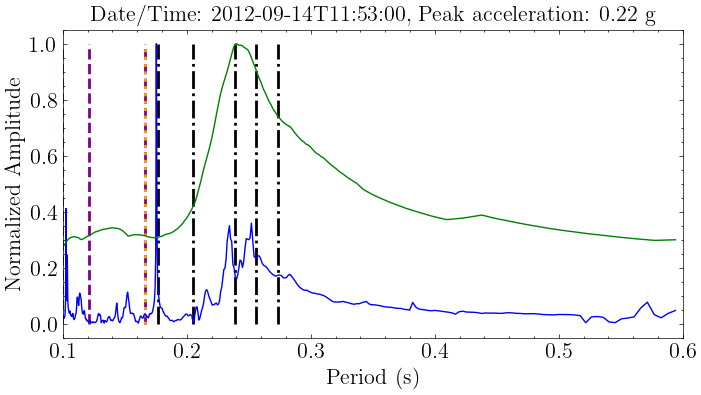

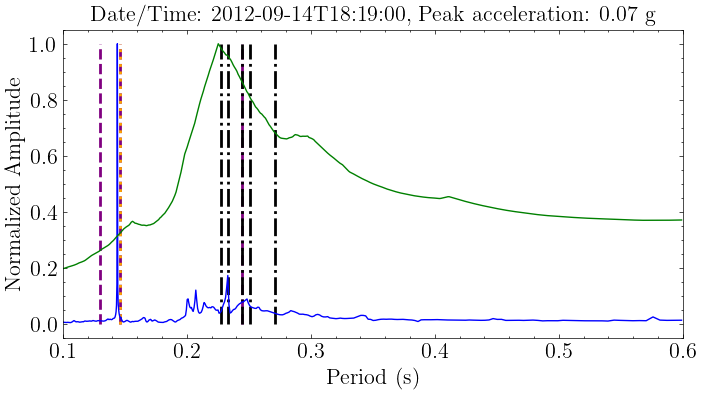

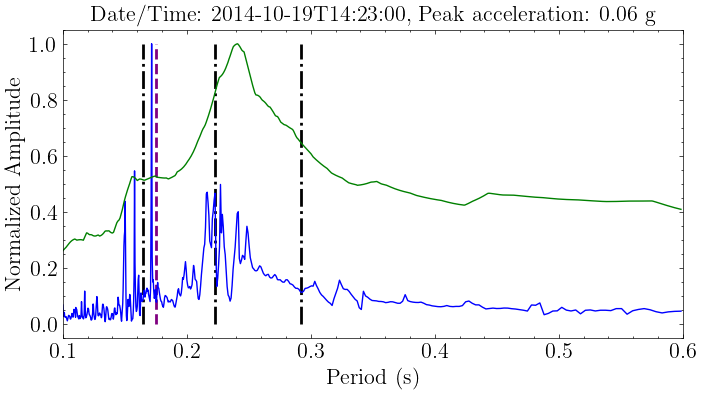

In [5]:
event_modes = []
from matplotlib import pyplot as plt

# fig, axs = plt.subplots(len(files), figsize=(6,2*len(files)), sharex=True, constrained_layout=True)
# axi = iter(axs)

# method = "srim"
methods = ["okid-era", "okid-era-dc", "srim"]
lstyles = ["dashed", "dotted", "dashdot"]
colors = ["purple", "orange", "black"]
realizations = {}
summary_table = {}

# for i, file in enumerate([files[0],files[-5]]):
for i, file in enumerate(files):
    # ax = next(axi) 
    fig, ax = plt.subplots(figsize=(8,4))
    print(file)
    try:
        event = quakeio.read(file, exclusions=["*filter*"])#, "*date*"])
        peak_accel = np.abs(event['peak_accel']*0.0010197162129779)
        event_date = event['event_date']
        print("peak acceleration (cm/s/s):", peak_accel)
        print("event date/time:", event_date)
        inputs, dt = extract_channels(event, data_conf.inputs)
        outpts, dt = extract_channels(event, data_conf.outputs)
        conf.decimation = 8 # decimation factor for state space methods
        summary_table[event_date] = {"peak acc": np.round((peak_accel),3)}
        for method in methods:
            realizations[method] = mdof.system(method=method, inputs=inputs, outputs=outpts, threads=18, chunk=200, **conf)
    except Exception as e:
        # raise e
        print(e)
        print(">>>>> Not read: ", file.name)
        continue
    for j,method in enumerate(methods):
        ss_modes = modal.system_modes(realizations[method],dt,**conf)
        ss_periods = [1/value["freq"] for value in ss_modes.values() if value["energy_condensed_emaco"]>0.5 and value["mpc"]>0.5]
        ax.vlines(ss_periods, 0, 1, linestyles=lstyles[j], color=colors[j], linewidth=2, label=f"{method.upper()}")# if i==0 else None)
        # event_modes.append(list(ss_modes.values()))
        summary_table[event_date][method] = np.round(np.max(ss_periods),3) if len(ss_periods)>0 else np.nan
    print_modes(ss_modes)
    conf.decimation = 1 # decimation factor for transfer function methods
    periods, amplitudes = transform.fourier_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, **conf)
    amplitudes = amplitudes/max(amplitudes)
    summary_table[event_date]['FSTF'] = np.round(modal.spectrum_modes(periods, amplitudes, prominence=0.1)[0][0],3)
    ax.plot(periods, amplitudes, label="FSTF", color="blue")
    periods, amplitudes = transform.response_transfer(inputs=inputs[0], outputs=outpts[0], step=dt, periods=periods, threads=8, **conf)
    amplitudes = amplitudes/max(amplitudes)
    summary_table[event_date]['RSTF'] = np.round(modal.spectrum_modes(periods, amplitudes, prominence=0.1)[0][0],3) if len(modal.spectrum_modes(periods, amplitudes)[0]) > 0 else np.nan
    ax.plot(periods, amplitudes, label="RSTF", color="green")
    ax.set_xlim(conf.period_band)
    # ax.set_title(title+"\n"+event["event_date"])
    ax.set_title(f"Date/Time: {event_date}, Peak acceleration: {np.round(peak_accel,2)} g")
    ax.set_xlabel("Period (s)")
    ax.set_ylabel("Normalized Amplitude")
    # if np.abs(peak_accel) < 1:
    #     legend_location = "upper right"
    # else:
    #     legend_location = "upper center"
    # ax.legend(loc=legend_location, frameon=True, framealpha=0.5)
    if i==1:
        ax.legend(loc='upper right', frameon=True, framealpha=0.5)
# fig.legend(bbox_to_anchor=(1.45,0.85))
# event_frequencies = mode_statistics(event_modes, "freq")
# fig.suptitle(title, fontsize=16)

In [6]:
import pandas as pd
pd.DataFrame(summary_table).T

,peak acc,okid-era,okid-era-dc,srim,FSTF,RSTF
2013-10-11T23:05:00,0.090,0.259,0.115,0.271,0.400,0.259
2016-12-08T14:50:00,0.031,NaN,NaN,0.236,0.432,0.237
2015-01-28T21:08:00,0.291,0.179,0.525,0.312,0.277,0.249
2019-06-23T03:52:00,0.248,0.401,0.401,0.284,0.248,0.251
2020-03-09T02:59:00,0.055,NaN,0.242,0.230,0.233,0.237
2021-12-20T21:53:00,0.031,0.278,0.278,0.272,0.375,0.236
2021-12-23T03:28:00,0.033,0.335,0.335,0.230,0.327,0.230
2022-04-04T15:16:00,0.056,NaN,0.375,0.398,0.402,0.234
2022-12-20T10:34:00,1.384,0.806,0.350,0.318,0.498,NaN
2022-12-20T10:38:00,0.143,NaN,0.269,0.300,0.445,0.313


In [7]:
# from mdof.macro import stabilization
# stabilization(inputs, outpts, dt=dt, orders=(2,50,2), plotly=True)